# Project 1:  Clustering Algorithms

## Assignment Overview

### Objective:
To provide students with hands-on experience in implementing clustering techniques on real-world datasets.

### About the data:
The Economist Democracy Index is an annual index compiled by the UK-based magazine, The Economist,   
through its Economist Intelligence Unit (EIU). This index rates the state of democracy across countries worldwide.    
  
It is based on five categories:

- **Electoral Process and Pluralism:**   
This measures the fairness of elections, the freedom to form political parties, and the participation of various groups in the political process.  

- **Functioning of Government:** This evaluates how effectively governments operate, the quality of governance, the level of corruption, and whether political decisions are made in a transparent manner. 

- **Political Participation:** This assesses the level of public involvement in politics, including voter turnout, membership in political parties, and engagement with political issues. 
 
- **Political Culture:** This looks at the societal norms and attitudes towards politics, including the extent to which different viewpoints are tolerated and the relationship between government and religion. 

- **Civil Liberties:** This gauges the extent of individual freedoms, including freedom of speech, freedom of the press, and the right to protest. 


**Countries are classified into four types of regimes based on their scores:**
 
- Full democracies 
- Flawed democracies 
- Hybrid regimes 
- Authoritarian regimes 

The Democracy Index is widely referenced in political and academic circles as a comprehensive measure of the state of democracy globally.   
It provides a snapshot of the health of democracy in each country and also allows for comparisons across countries and over time. 

[Additional information on Democracy Index ](https://en.wikipedia.org/wiki/The_Economist_Democracy_Index)

## Step 1: Access the dataset for use in your Notebook.   

You can find a csv version of this dataset already installed in your lab as `democracy_index.csv`, or download it for local use through 
[this link](https://github.com/JustGlowing/minisom/blob/master/examples/democracy_index.csv). 

## **Step 2:**  Clustering Implementation (Tasks) 

Please follow and complete each step below to complete the assignment.

### **Task 1:** Load the democracy index data set 

In [2]:
#import libbraries
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
%matplotlib inline
# Load the dataset
demo_df = pd.read_csv("/home/jovyan/work/democracy_index.csv")
# View the heads of the dataset
demo_df.head()

,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy


## By reading the head of the data to have a general understanding of the dataset especially the colunms and its coresponding values and types.

### **Task 2:**  Use the five categories to cluster countries into different regimes 

In [20]:
# count how many columns in the dataset
print("Columns in original dataset: %d \n" % demo_df.shape[1])
# get the number of missing data points per column and view the first 10 colunms
missing_values_count = demo_df.isnull().sum()
print(missing_values_count[0:10])
# get the datatypes of each colunm
dresult = demo_df.dtypes
print(dresult)

Columns in original dataset: 10 

Unnamed: 0                        0
rank                              0
country                           0
democracy_index                   0
electoral_processand_pluralism    0
functioning_of_government         0
political_participation           0
political_culture                 0
civil_liberties                   0
category                          0
dtype: int64
Unnamed: 0                          int64
rank                               object
country                            object
democracy_index                   float64
electoral_processand_pluralism    float64
functioning_of_government         float64
political_participation           float64
political_culture                 float64
civil_liberties                   float64
category                           object
dtype: object


## 1. Identified 10 colunms that none of them have missing values.
## 2. I will drop colunm "Unnamed: 0" due to its non-relevance to our dataset
## 3. I will drop "category" because it is categorical variables that k-means algorithm is not applicable to categorical variables because the Euclidean distance function is not really meaningful for distcete variables.

In [21]:
# drop columns
df = demo_df.drop(['Unnamed: 0','category'], axis=1)
# view the heads of the dataset
df.head()

,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71
1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71
2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41
3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00
4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12


### **Task 3:**  Preprocess the data (if necessary), such as normalizing or scaling the features 
**a:** Find out why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering  
**b:** Do we need to use scaling techniques for this dataset? 


## I will normalize the dataset because our mathematical algorithms need to interpret equally for features that have different magnitudes and distributions. Here I'll use StandardScaler() to do this. I'll also replace NaN value with Zero to process the dataset


In [16]:
# import library
from sklearn.preprocessing import StandardScaler
# set array X to represent values of dataframe include all rows and columns after "country" colunm
X = df.values[:,2:]
# replace NaN values with zero
X = np.nan_to_num(X)
# standarize the dataset X to clus_dataset
clus_dataset = StandardScaler().fit_transform(X)
# view the dataset
clus_dataset

array([[ 2.00265726,  1.16078504,  1.89080153,  2.53899474,  2.68165664,
         1.47733893],
       [ 1.87040657,  1.16078504,  1.75163545,  1.94570167,  2.68165664,
         1.47733893],
       [ 1.78375956,  1.0417902 ,  1.89080153,  1.64638265,  2.68165664,
         1.36490075],
       ...,
       [-1.81893175, -1.53076502, -1.65992155, -1.61940169, -1.49963723,
        -1.83209148],
       [-1.84629396, -1.67242555, -1.94222988, -1.32008267, -0.73884868,
        -2.16191014],
       [-2.00590687, -1.67242555, -0.94818647, -1.91337573, -2.64386321,
        -2.16191014]])

### **Task 4:**  Implement K-means clustering to categorize the data into clusters 
**a:** Use elbow method to determine number of clusters   
**b:** Verify if the solution offered by the elbow method and the actual soultion (number of regimes) match   
**c:** Do we need to use elbow method to detrmine number of clusters for this dataset?   


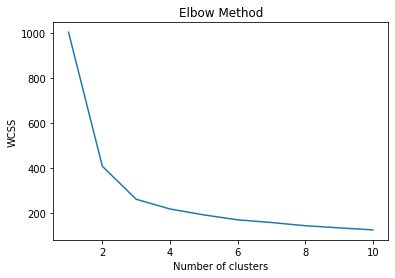

In [17]:
# I will calculate the sum of squared distance (WCSS) for each value of the k to identify elbow 
# point to indicate the optimal number of clusters

# apply the elbow method
wcss =[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=12,random_state=0)
    k_means.fit(clus_dataset)
    wcss.append(k_means.inertia_)

# plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

## Based on the graph, the optimal number of clusters (3) determined by the elbow method which does not match the actual number of regimes (4), it indicates that there might be some complexities in the dataset that are not captured well by k-means algorithm. we do need to use elbow method for this dataset to come to a conclusion of this analysis.

### **Task 5:**  Implement Hierarchical clustering using an appropriate linkage method 
**a:** Try different linkage criteria 

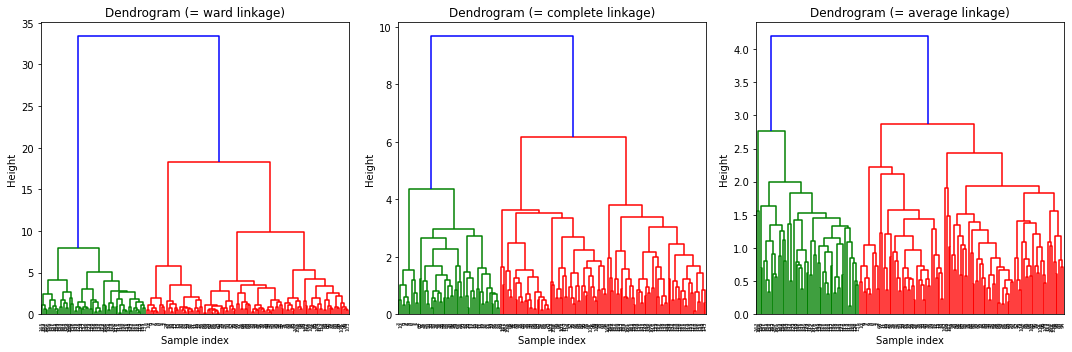

In [18]:
# import library
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Calculate linkage matrices for different methods
linkage_methods = ['ward', 'complete', 'average']
linkages = {}
for method in linkage_methods:
    linkages[method] = linkage(clus_dataset, method=method)

# Generate dendrograms based on different linkage
plt.figure(figsize=(15, 5))
for i, (method, Z) in enumerate(linkages.items()):
    plt.subplot(1, 3, i + 1)
    plt.title(f'Dendrogram (= {method} linkage)')
    dendrogram(Z)
    plt.xlabel('Sample index')
    plt.ylabel('Height')
plt.tight_layout()
plt.show()

## 1. The ward linkage produces clusters of relatively equal size and shape indicates that data points within the cluster are more similar to each other. If we want a clear seperated clusters of 3, we cut off the dendrogram at height between 10 to 15.
## The complete and average linkage dendrogram produces graphs with more taller and compact clusters.
## 2.  For complete linkage dendrogram, if we want a clear seperated clusters of 3, we cut the graph at height of 5 to 6.
## 3.  For average linkage dendrogram, there's no clear clusters of 3 can be cut from the height. Instead, if we cut at height of 3 to 4, we have 2 clusters that are visually distinct from each other.
## 4.  Compare ward dendrogram and complete dendrogram, based on the different height cut I used previously, I would say ward capatures broader patterns based on its higher height while complete captures more specific patterns within the data.
## 5.  Consider we are looking for identifying regimes categories which I think it's better to capture broader characteristic among countries. 

### **Task 6:** Plot the democracy index values

For aforementioned methods generate the clustering solution. The clustering solution simply groups the countries into different groups   
based on similarity. Once the solution is obtained, plot density plots of democracy index values considering all the countries within a group. 


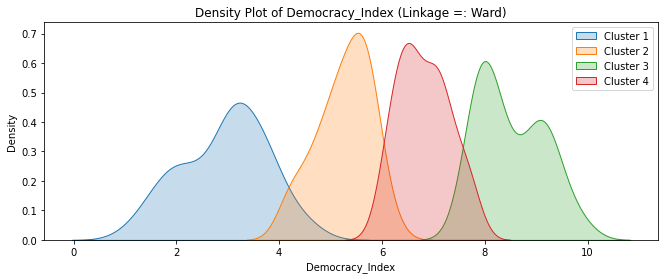

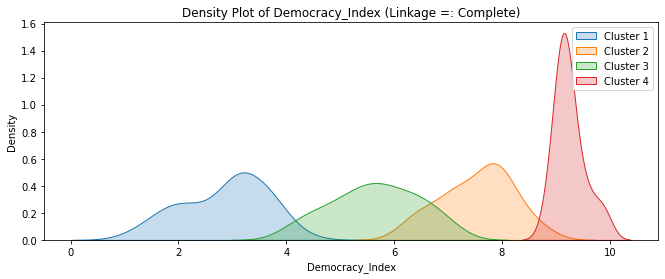

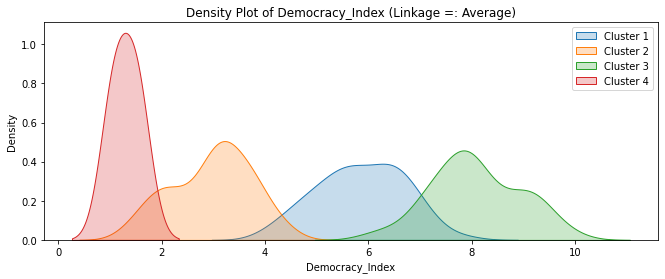

In [19]:
# import library for clustering
from sklearn.cluster import AgglomerativeClustering
# import seaborn for density plot
import seaborn as sns 

# Perform hierarchical clustering with different linkage criteria
linkage_criteria = ['ward', 'complete', 'average']

# number of clusters defines to 4 since we have 4 regimes wanted for categorization
number_clusters = 4

for link in linkage_criteria:
    # initialize hierarchical clustering with the specified linkage criteria
    agg_clustering = AgglomerativeClustering(n_clusters=number_clusters, linkage=link)
    
    # Fit the model to the data
    agg_clustering.fit_predict(clus_dataset)
    
    # get cluster labels, retrieve the cluster labels assigned to each data point after the hierachical clustering
    cluster_labels = agg_clustering.labels_
    
    # Assign cluster labels to the original DataFrame so we can associate each country with its respective cluster label.
    df['Cluster'] = cluster_labels
    
    # plot density plots for each cluster; loop through each cluster, filter the df to select the democracy_index value
    # for those countries that are within the specific cluster as well as assign them to the variable cluster_data then use this
    # to plot density plots.
    plt.figure(figsize=(11, 4))
    for cluster in range(number_clusters):
        cluster_data = df[df['Cluster'] == cluster]['democracy_index']
        # use kdeplot function to plot the density plots
        sns.kdeplot(cluster_data, label=f'Cluster {cluster+1}', shade=True)
    plt.title(f'Density Plot of Democracy_Index (Linkage =: {link.capitalize()})')
    plt.xlabel('Democracy_Index')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

## Based on the graphs: 
## 1. All three graphs have significant parts are overlapped which indicates those countries have similar distributions that are not clearly distinct and separated by our algorithms.
## 2. From the perspective of cluster size, linkage "complete" and "average" both have one cluster that are way taller and narrower than other clusters', which indicates that the countries within that specific cluster are more tightly clustered.
## 3. From the shape and overlapping area, I would say using linkage "ward" is more appropricate for this dataset and would provide more confidence in the identified clusters.

## Submission Guidelines

- All codes should be well-commented to explain your thought process and implementation details. 
- Include all visualizations in your final report. 
- Your report should detail the steps you took, any challenges faced, and the insights or conclusions you drew from the visualizations  

### Evaluation Criteria:
 
**Tasks to be Completed and their point values:**
- Variable selection and scaling (10 points)
- K-means clustering implementation (40 points)
- Hierarchical clustering implementation (40 points)
- Density Plots (10 points)

## Submitting your Project

Once you've completed your project, it's time to submit your work for grading.   
This week, you will submit your code file `Project 1.ipynb` to the following Staff Graded Assignment for review.  

In order to submit your work, please follow the steps below:
1. Verify you've saved your work using the `Save` button within the Jupyter Notebook 
2. Download this notebook using the `File` -> `Download As` -> Choose the `Notebook (.ipynb)` format.
3. Access the following Step 2: Submit Project 1 item.
4. Complete all prompted fields, and upload your Jupyter Notebook file (Project 1.ipynb) in the indicated field.
5. Submit your notebook to "Step 2: Submit Project 1" by the deadline indicated within your course view for the Project 3 Assignment item.

Congratulations on completing the Project 1 Assignment!